In [1]:
import sys
sys.path.append('../../src')
from data_loading import *
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

from stats_helpers import *
from population_pyramid_helpers import *
from security_equipments_helper import *
from weather_road_conditions_helpers import *

In [2]:
# Load dataset

data_2018 = YearLoader(2018)
pyramid_data = get_dead_alive_gender_df(data_2018)

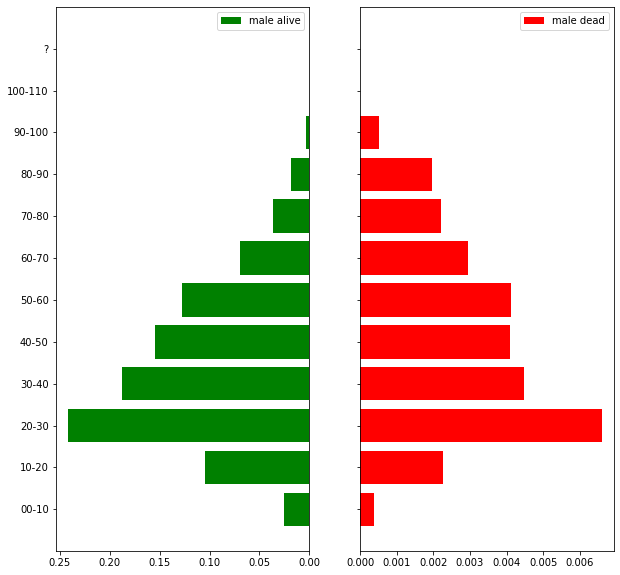

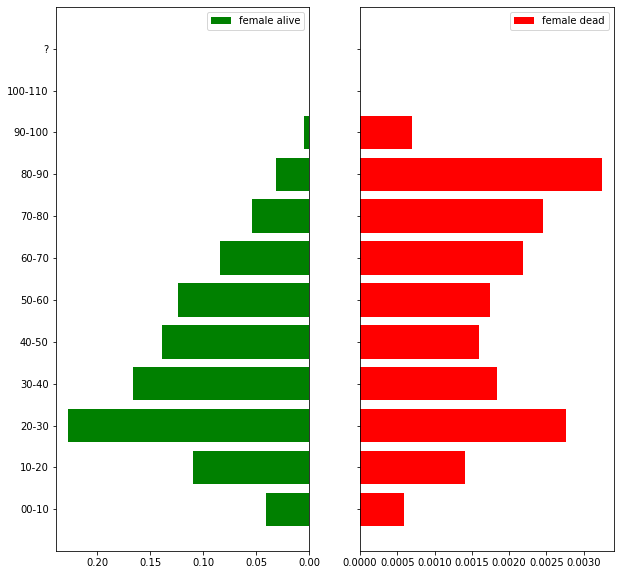

In [3]:
#J'ai modifié cette fonction pour avoir le scale, c'est pour cela que je vous la met ici, si ce scale vous va, on changera le helper
def plot_pyramid_dead_alive_gender(df, female=False, male=True, figsize=(10,10), xlim = None):
    """Plot population pyramid (male_dead, male_alive, female_dead, female_alive) for each age group.

    Parameters
    ----------
    df : pandas.DataFrame
        pyramid_data (get_dead_alive_gender_df() function).
    female : bool
        show female plot.
    male : bool
        show male plot.
    figsize : tuple
        (x, y) figsize for plots.
    xlim : tuple
        (min,max) x axis limits.
    """

    if male:
        fig_male, axes_male = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_male[0].barh(df['age_group'], df['male_alive']/(pyramid_data['male_alive'].sum()+pyramid_data['male_dead'].sum()), align='center', color='green')
        axes_male[1].barh(df['age_group'], df['male_dead']/(pyramid_data['male_alive'].sum()+pyramid_data['male_dead'].sum()), align='center', color='red')
        axes_male[0].set_xlim(xlim)
        axes_male[1].set_xlim(xlim)
        axes_male[0].invert_xaxis()
        axes_male[0].legend(['male alive'])
        axes_male[1].legend(['male dead'])
        plt.show()
        
    if female:
        
        fig_female, axes_female = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_female[0].barh(df['age_group'], df['female_alive']/(pyramid_data['female_alive'].sum()+pyramid_data['female_dead'].sum()), align='center', color='green')
        axes_female[1].barh(df['age_group'], df['female_dead']/(pyramid_data['female_alive'].sum()+pyramid_data['female_dead'].sum()), align='center', color='red')
        axes_female[0].set_xlim(xlim)
        axes_female[1].set_xlim(xlim)
        axes_female[0].invert_xaxis()
        axes_female[0].legend(['female alive'])
        axes_female[1].legend(['female dead'])

        plt.show()

plot_pyramid_dead_alive_gender(pyramid_data, male=True, female=True, xlim= None)

# Gravity and Gender

In [4]:
data = YearLoader(2018).get_dataframe("passengers")

gender_stats = ChiSquare(data['sexe'],data['grav'])

contingency_table :-
 grav      1     2      3      4
sexe                           
1     39028  2615  15487  31088
2     15220   777   6682  19272
Observed Values :-
 [[39028  2615 15487 31088]
 [15220   777  6682 19272]]
Expected Values :-
 [[36764.89843204  2298.82273045 15024.35174273 34129.92709478]
 [17483.10156796  1093.17726955  7144.64825727 16230.07290522]]
Degree of Freedom:- 1
chi-square statistic:- 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


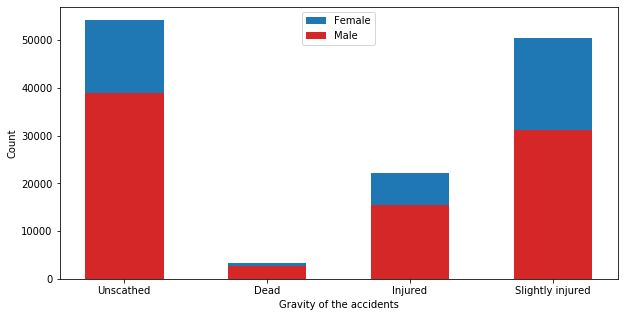

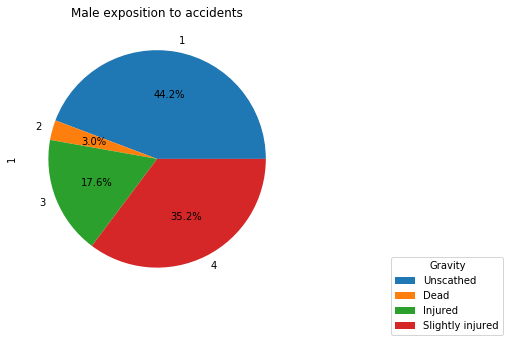

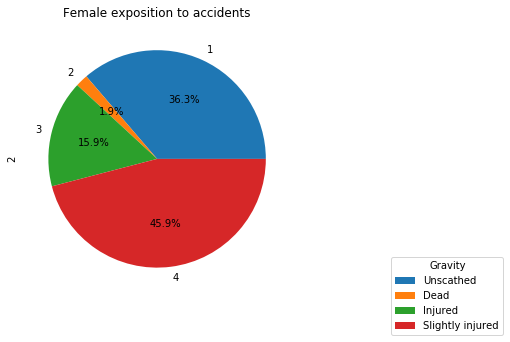

In [5]:
plot_gender_vs_gravity_contingency(YearLoader(2018))

# Gravity and security equipments

In [6]:
codes_seatbelt = [11]           # Codes if seatbelt attached
years = list(range(2008, 2019)) # All years

In [7]:
df_grav = get_gravity_over_years(codes_seatbelt, years)

In [8]:
data = stats_df_security_gravity([11,12],years)

In [9]:
Chi_square_gravity_vs_seatbelt = ChiSquare(data['secu'],data['grav'])

contingency_table :-
 grav      1     2      3      4
secu                           
11    52995  1686  13075  24615
12      721   543   1054    638
Observed Values :-
 [[52995  1686 13075 24615]
 [  721   543  1054   638]]
Expected Values :-
 [[52050.31770642  2159.88082075 13690.87308947 24469.92838335]
 [ 1665.68229358    69.11917925   438.12691053   783.07161665]]
Degree of Freedom:- 1
chi-square statistic:- 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


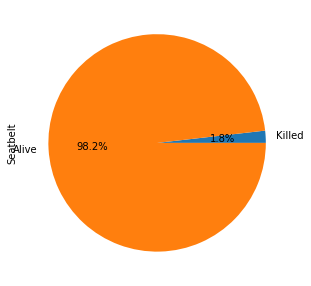

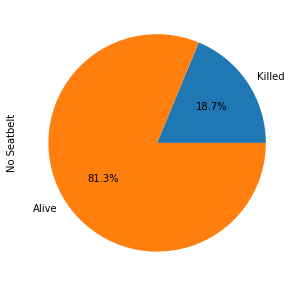

In [10]:
plot_seatbelt_vs_gravity_contingency()

# Gravity and Weather Conditions

In [11]:
data = stats_df_weather_gravity(years)

In [12]:
Chi_square_gravity_vs_seatbelt = ChiSquare(data['atm'],data['grav'])

contingency_table :-
 grav       1      2       3       4
atm                                
1     521212  32855  257930  453147
2      65647   3753   30620   64085
3      14039   1108    7783   12734
4       4241    332    2257    3331
5       3966    701    3283    2822
6       1274    213    1034    1062
7       7730    823    5211    4252
8      20100   1953   11441   17425
9       3783    510    2821    3528
Observed Values :-
 [[521212  32855 257930 453147]
 [ 65647   3753  30620  64085]
 [ 14039   1108   7783  12734]
 [  4241    332   2257   3331]
 [  3966    701   3283   2822]
 [  1274    213   1034   1062]
 [  7730    823   5211   4252]
 [ 20100   1953  11441  17425]
 [  3783    510   2821   3528]]
Expected Values :-
 [[5.17660434e+05 3.40660289e+04 2.59946184e+05 4.53471353e+05]
 [6.71470327e+04 4.41879001e+03 3.37182712e+04 5.88209061e+04]
 [1.45926801e+04 9.60310332e+02 7.32779882e+03 1.27832107e+04]
 [4.15758812e+03 2.73601202e+02 2.08775695e+03 3.64205372e+03]
 [4.407591

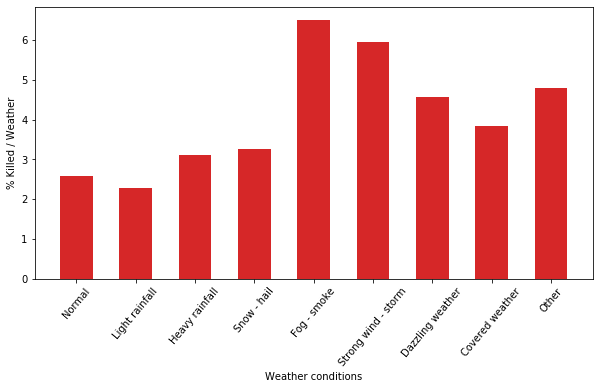

In [13]:
plot_weather_vs_gravity_contingency()